In [2]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os

['log_1107_2110', 'config.txt', 'log_1107_2136', 'log_1107_2130', 'log_1107_1742', 'log_1107_2133', 'log_1107_2135', 'log_1107_2134', 'log_1107_2120']
dict_keys(['fixedFrequency'])
dict_keys(['timestamp', 'acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z', 'stabilizer.roll', 'stabilizer.pitch', 'stabilizer.yaw', 'stabilizer.thrust', 'ctrltarget.rollRate', 'ctrltarget.pitchRate', 'ctrltarget.yawRate'])


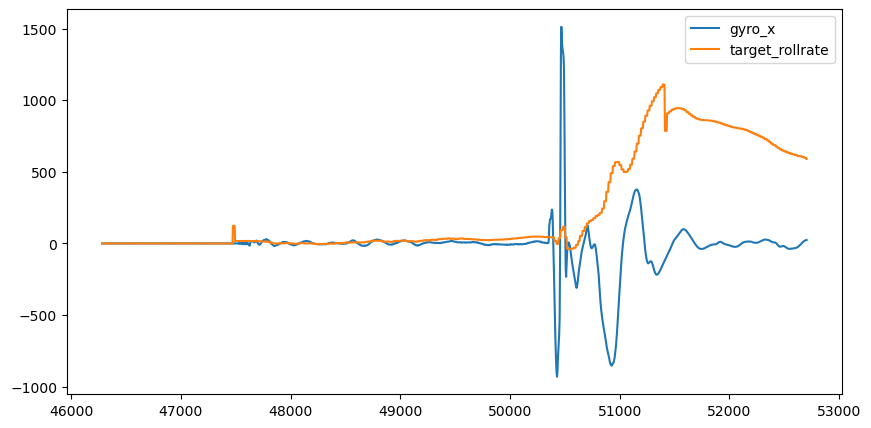

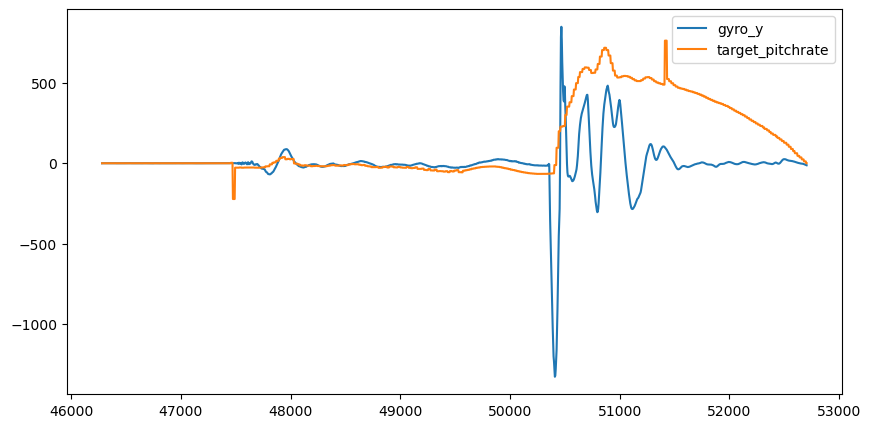

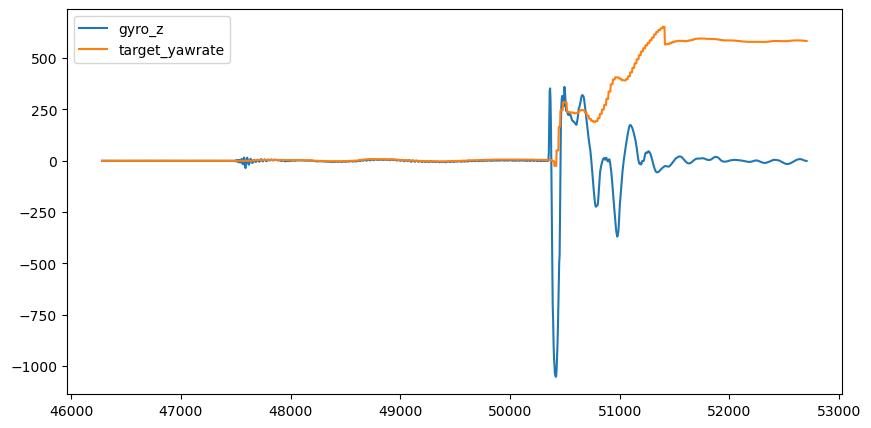

In [6]:
folder = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/"
print(os.listdir(folder))
file = f"{folder}log_1107_2136"

data_usd = cfusdlog.decode(file)
print(data_usd.keys())
fixed_freq = data_usd['fixedFrequency']
print(fixed_freq.keys())

t = fixed_freq['timestamp']
gyro_x = fixed_freq['gyro.x']
gyro_y = fixed_freq['gyro.y']
gyro_z = fixed_freq['gyro.z']
target_rollrate = fixed_freq['ctrltarget.rollRate']
target_pitchrate = fixed_freq['ctrltarget.pitchRate']
target_yawrate = fixed_freq['ctrltarget.yawRate']

plt.figure(figsize=(10, 5))
plt.plot(t, gyro_x, label='gyro_x')
plt.plot(t, target_rollrate, label='target_rollrate')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, gyro_y, label='gyro_y')
plt.plot(t, target_pitchrate, label='target_pitchrate')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, gyro_z, label='gyro_z')
plt.plot(t, target_yawrate, label='target_yawrate')
plt.legend()
